<b><font size="6">|006|SVM|Multi-Feature Salary Prediction </font></b>

* **Author**: Dino Giovannoni
* **Date:**: 5-April-2024


**The Problem:** 

**The Dataset**
https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer

In [1]:
import numpy as np 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv('Salary Data.csv')

# Data Pre-Processing

## Data Inspection

In [3]:
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


None

From the inspection of the data we see that there are 3 quantitative variables and 3 categorical variables. 
Let's check the values of the three categorical variables:

In [5]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [6]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', nan], dtype=object)

In [7]:
# df["Job Title"].unique()

There are a lot of job titles (we count how many as follows). This means that the job title will be of little value in the learning algorithm, so we can drop the variable as a possible feature.

In [8]:
len(df["Job Title"].unique())

175

## Removing Job Title feature

In [9]:
df.drop("Job Title", axis =1, inplace=True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Years of Experience  373 non-null    float64
 4   Salary               373 non-null    float64
dtypes: float64(3), object(2)
memory usage: 14.8+ KB


None

## Removing Null Values

We see that there are 375 entries, but 373 non-null entries. This means that there are null values in the dataframe.
We can confirm this using the pandas dataframe **isna()** method:

In [10]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Years of Experience    2
Salary                 2
dtype: int64

It seems like all the data fields are N/A for 2 rows.
Let's identify them:

In [11]:
df[df["Age"].isna()]

,Age,Gender,Education Level,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN


We can use the dataframe **dropna()** method to remove these entries. We can do a quick check to confirm that there are no null values in the resulting dataframe.

In [12]:
df.dropna(inplace=True)
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Years of Experience    0
Salary                 0
dtype: int64

## Duplicates

In [13]:
df.duplicated().sum()

np.int64(99)

There are several duplicate record in the dataset. Thus may skew the results. Let's remove the duplicate data rows.

In [14]:
# df.drop_duplicates(inplace=True)

Having removed some records from the dataset, we can now re-index the dataframe. (This is not really necessary.)

In [15]:
df.reset_index(inplace=True, drop=True)

In [16]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Years of Experience  373 non-null    float64
 4   Salary               373 non-null    float64
dtypes: float64(3), object(2)
memory usage: 14.7+ KB


None

## Encoding the Categorical variables

The education is a **ordinal** categorical variable, as there is a natural ordering as far as level of education is concerned.

In [17]:
df["Education Level"].unique().tolist()

["Bachelor's", "Master's", 'PhD']

In [18]:
education_mapping = {"Bachelor's" : 1, 
           "Master's"   : 2, 
           'PhD'        : 3
          }
gender_mapping = {"Male": 0, "Female" : 1}

education_level = {v: k for k, v in education_mapping.items()}
gender = {v: k for k, v in gender_mapping.items()}

df["Education"] = df["Education Level"].map(education_mapping)
df["Gender"] = df["Gender"].map(gender_mapping)
df.drop('Education Level', axis=1, inplace = True)

# Move 'Salary' column to the last position
salary = df.pop('Salary')
df['Salary'] = salary
display(df.head())

,Age,Gender,Years of Experience,Education,Salary
0,32.0,0,5.0,1,90000.0
1,28.0,1,3.0,2,65000.0
2,45.0,0,15.0,3,150000.0
3,36.0,1,7.0,1,60000.0
4,52.0,0,20.0,2,200000.0


## Some Descriptive Statistics

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Gender,373.0,0.479893,0.500267,0.0,0.0,0.0,1.0,1.0
Years of Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Education,373.0,1.536193,0.723569,1.0,1.0,1.0,2.0,3.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


## Scaling the variables

As noted earlier when looking at the descriptive statistics, we see that the input data contains variables with vastly different ranges. This becomes evident when we generate box plots of the input data as follows

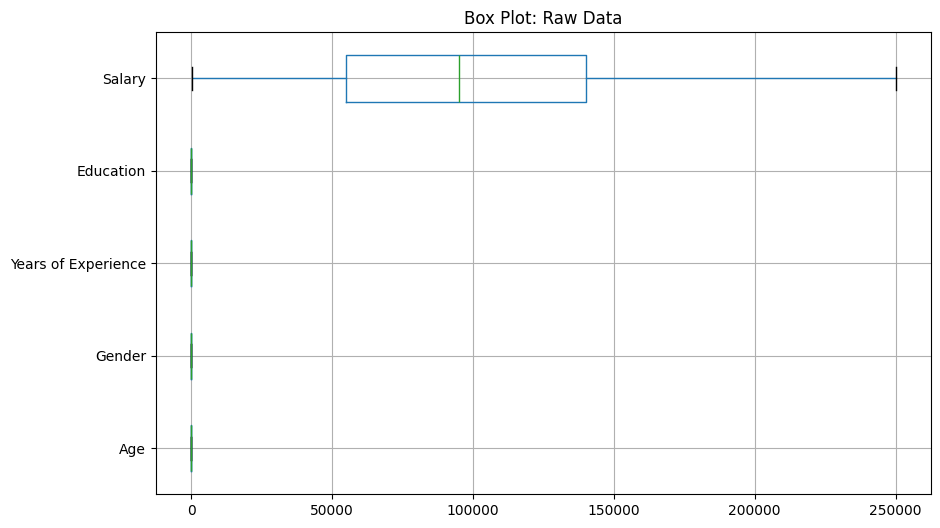

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df.boxplot(vert = False, ax=ax)  
_ = ax.set_title(f'Box Plot: Raw Data')

In [21]:
salary_scale_factor = 1/10000
df["Salary"] = df["Salary"]*salary_scale_factor

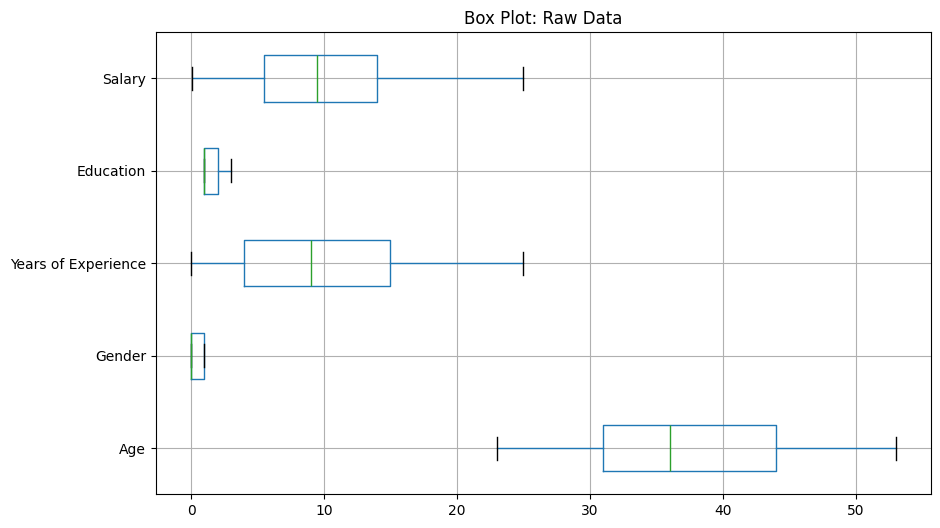

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df.boxplot(vert = False, ax=ax)  
_ = ax.set_title(f'Box Plot: Raw Data')

### Plot Histograms

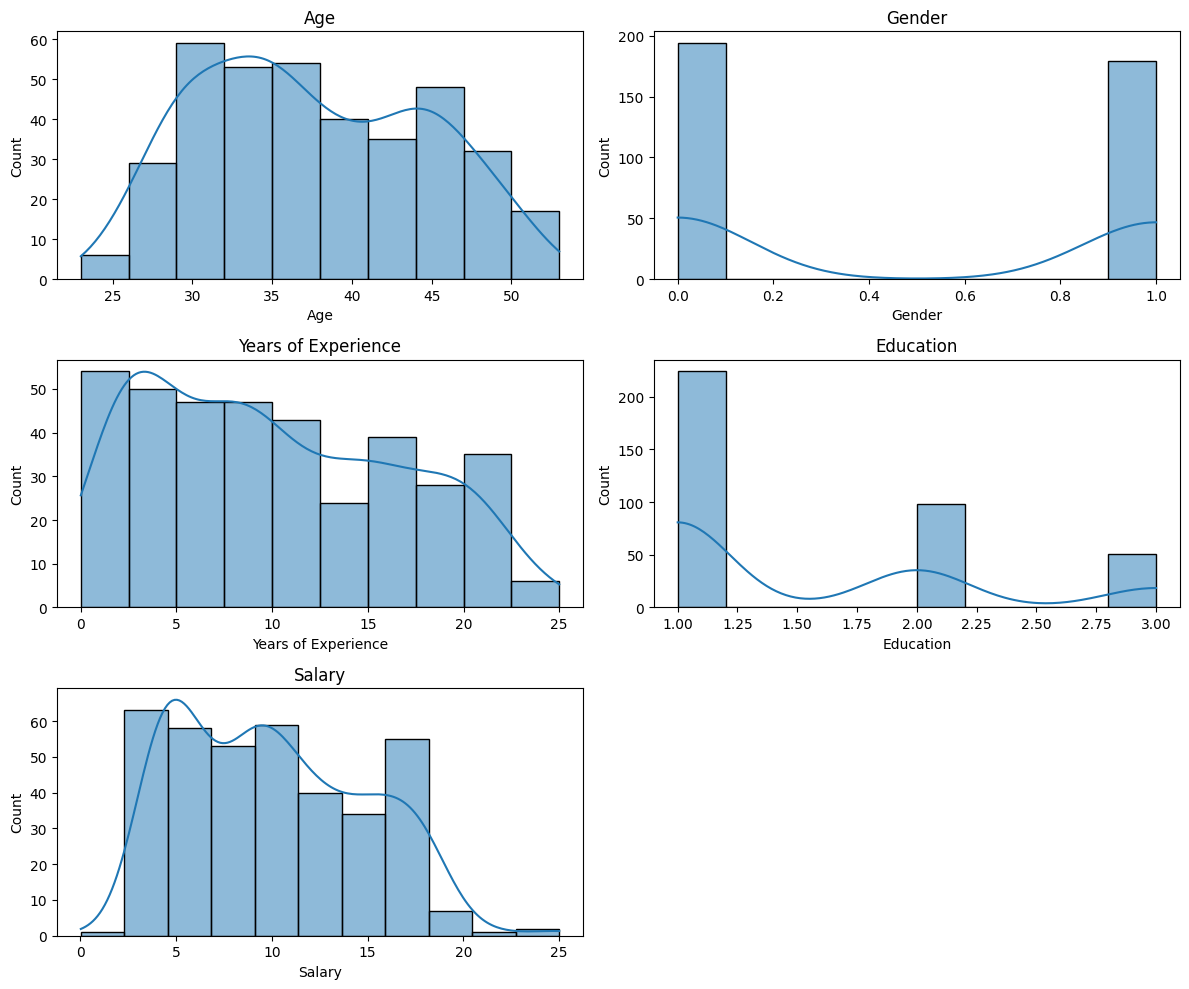

In [23]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## Correlation analysis

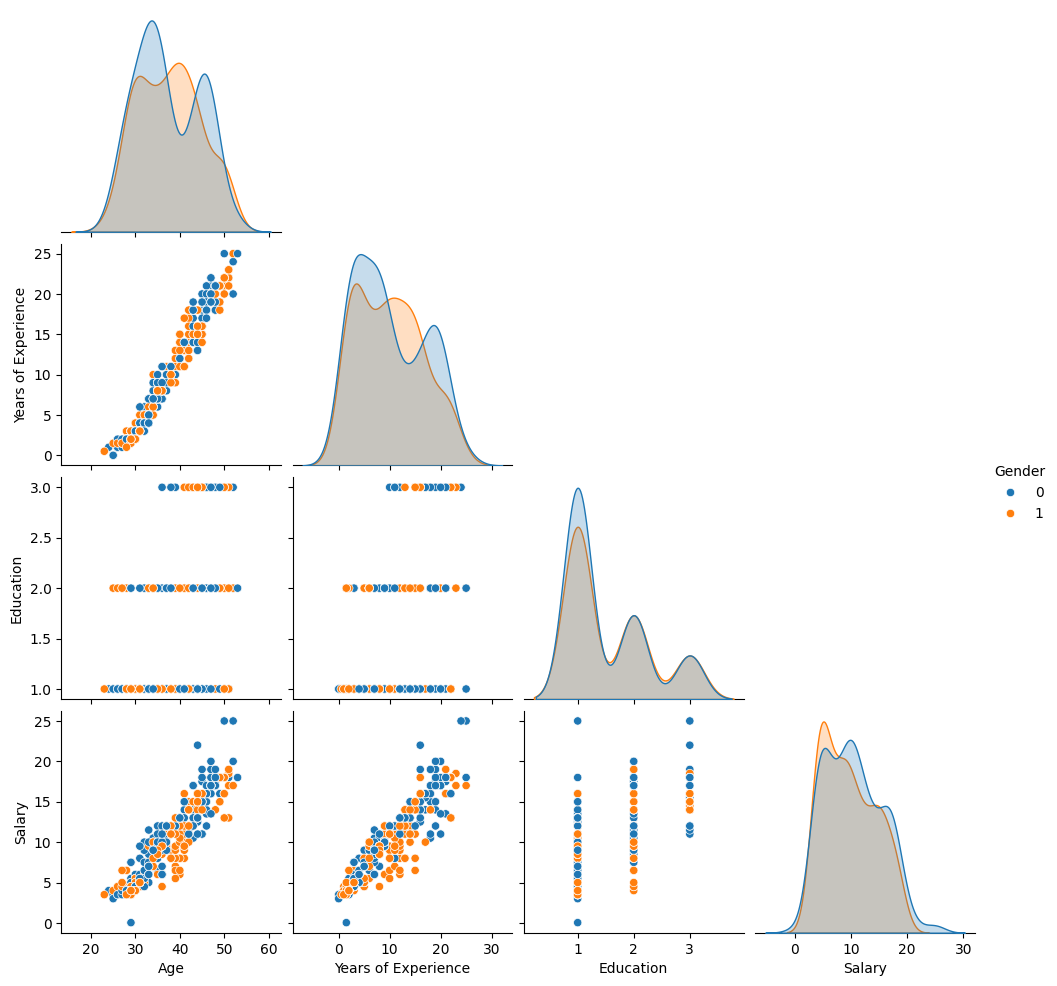

In [24]:
_ = sns.pairplot(df, hue="Gender", corner=True)

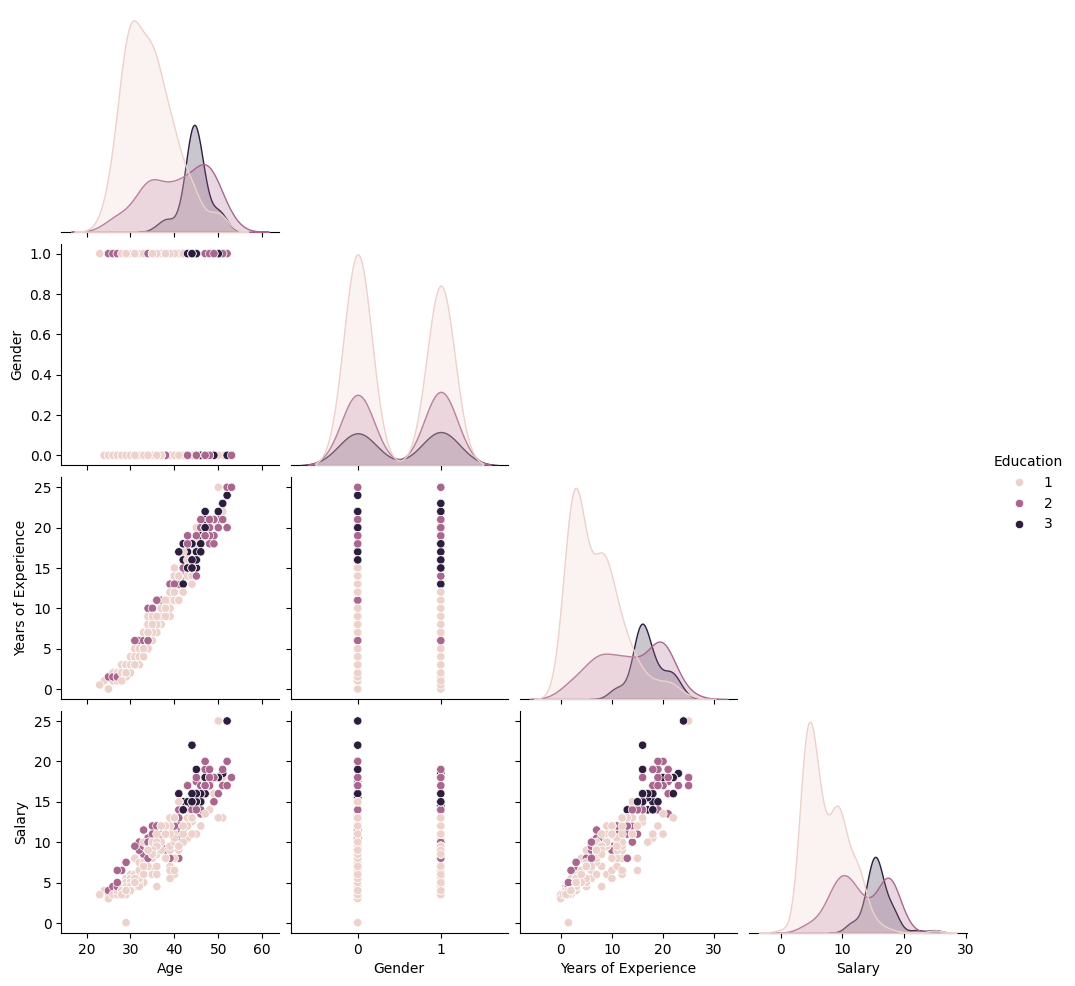

In [25]:
_ = sns.pairplot(df, hue="Education", corner=True)

<Axes: >

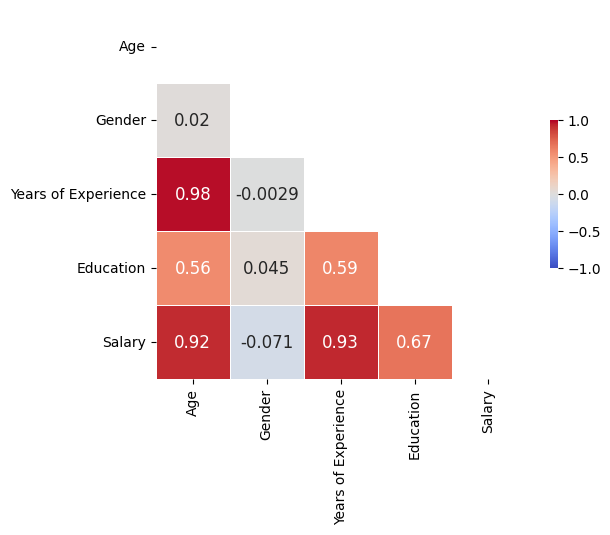

In [26]:
df.corr()

# Create a mask
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(),
            square = True,
            linewidths = .5,
            cmap = 'coolwarm',
            cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
            vmin = -1, 
            vmax = 1,
            annot = True,
            annot_kws = {'size': 12}, 
            mask = mask
           )

As one could expect, there is a strong correlation between **_Age_** and **_Years of Experience_**. After all as one gets older, one has more experience.
It seems like there is a slightly higher correlation between **_Salary_** and **_Years of Experience_** than with **_Age_**.

## Feature Selection

In [27]:
output_var = "Salary"
X = df.drop(columns = ["Salary"])
y = df["Salary"]
display(X.head(), y.head())

,Age,Gender,Years of Experience,Education
0,32.0,0,5.0,1
1,28.0,1,3.0,2
2,45.0,0,15.0,3
3,36.0,1,7.0,1
4,52.0,0,20.0,2


0     9.0
1     6.5
2    15.0
3     6.0
4    20.0
Name: Salary, dtype: float64

# Model

## Split data into training and test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

## Training the models

In [29]:
model_linreg = LinearRegression().fit(X, y)
model_dtree  = DecisionTreeRegressor(random_state=0).fit(X, y)
model_svm    = SVR(kernel='linear').fit(X, y)

In [30]:
y_train_pred_linreg = model_linreg.predict(X_train)
y_test_pred_linreg  = model_linreg.predict(X_test)

y_train_pred_dtree = model_dtree.predict(X_train)
y_test_pred_dtree  = model_dtree.predict(X_test)

y_train_pred_svm = model_svm.predict(X_train)
y_test_pred_svm  = model_svm.predict(X_test)

# Evaluate

## Comparing Prediction vs Actual

In [31]:
def pred_scatter_plot(actual, pred, title, figsize=(4, 4)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.scatter(actual, pred, s=10)
    plt.plot([0, actual.max()], [0, actual.max()], color = 'red', linestyle='dashed')
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')
    plt.axis('equal')
    plt.title(title)
    plt.tight_layout()    
    

### Training Data

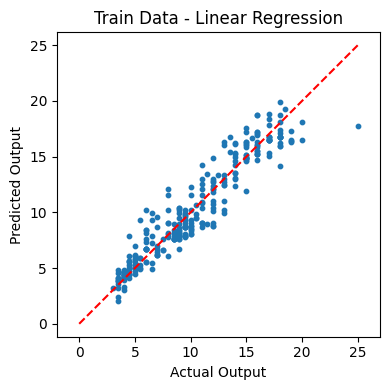

In [32]:
pred_scatter_plot(y_train, y_train_pred_linreg,'Train Data - Linear Regression' )

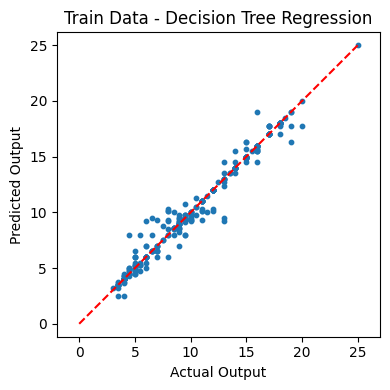

In [33]:
pred_scatter_plot(y_train, y_train_pred_dtree,'Train Data - Decision Tree Regression' )

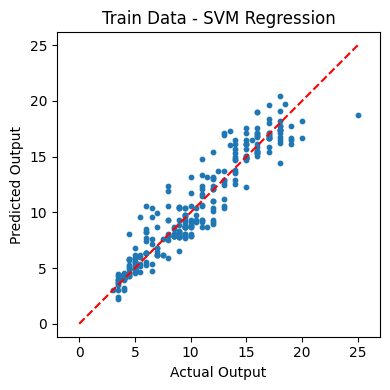

In [34]:
pred_scatter_plot(y_train, y_train_pred_svm,'Train Data - SVM Regression' )

### Test Data

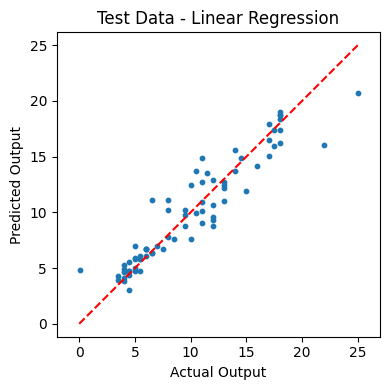

In [35]:
pred_scatter_plot(y_test, y_test_pred_linreg,'Test Data - Linear Regression' )

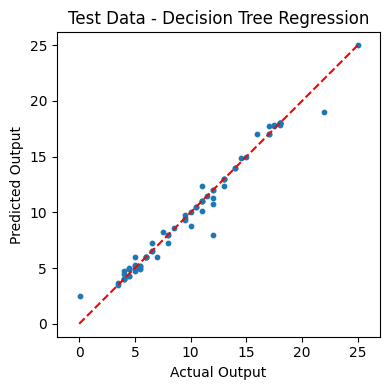

In [36]:
pred_scatter_plot(y_test, y_test_pred_dtree,'Test Data - Decision Tree Regression' )

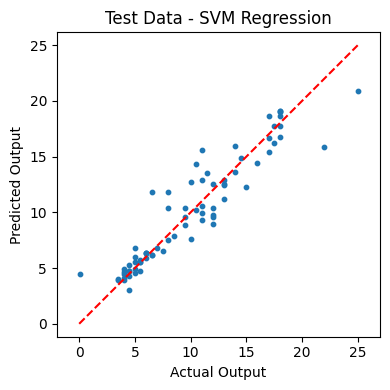

In [37]:
pred_scatter_plot(y_test, y_test_pred_svm,'Test Data - SVM Regression' )

## Regression Metrics

In [ ]:
train_mse_linreg =  np.round(mean_squared_error(y_train, y_train_pred_linreg),3) # 3 decimals
train_rmse_linreg =  int(np.round(np.sqrt(train_mse_linreg)/salary_scale_factor,0)) # 0 Decimals

train_mse_dtree =  np.round(mean_squared_error(y_train, y_train_pred_dtree),3)
train_rmse_dtree =  int(np.round(np.sqrt(train_mse_dtree)/salary_scale_factor,0))

train_mse_svm =  np.round(mean_squared_error(y_train, y_train_pred_svm),3)
train_rmse_svm =  int(np.round(np.sqrt(train_mse_svm)/salary_scale_factor,0))

print('TRAINING DATA:')
print(f'Linear Regression RMSE        : ${train_rmse_linreg:,}')
print(f'Decision Tree Regression RMSE : ${train_rmse_dtree:,}')
print(f'SVM Regression RMSE           : ${train_rmse_svm:,}')

TRAINING DATA:
Linear Regression RMSE        : $14,460
Decision Tree Regression RMSE : $7,855
SVM Regression RMSE           : $14,670


In [39]:
test_mse_linreg =  np.round(mean_squared_error(y_test, y_test_pred_linreg),3)
test_rmse_linreg =  int(np.round(np.sqrt(test_mse_linreg)/salary_scale_factor,0))

test_mse_dtree =  np.round(mean_squared_error(y_test, y_test_pred_dtree),3)
test_rmse_dtree =  int(np.round(np.sqrt(test_mse_dtree)/salary_scale_factor,0))

test_mse_svm =  np.round(mean_squared_error(y_test, y_test_pred_svm),3)
test_rmse_svm =  int(np.round(np.sqrt(test_mse_svm)/salary_scale_factor,0))

print('TESTING DATA:')
print(f'Linear Regression RMSE        : ${test_rmse_linreg:,}')
print(f'Decision Tree Regression RMSE : ${test_rmse_dtree:,}')
print(f'SVM Regression RMSE           : ${test_rmse_svm:,}')

TESTING DATA:
Linear Regression RMSE        : $17,863
Decision Tree Regression RMSE : $7,823
SVM Regression RMSE           : $18,292


## Prediction

In [40]:
X_train.columns

Index(['Age', 'Gender', 'Years of Experience', 'Education'], dtype='object')

In [41]:
X_new_dict = {"Age": 40, "Gender": 1,  "Years of Experience":10, "Education": 2}
X_new = pd.DataFrame.from_dict(X_new_dict, orient='index').T

y_pred_linreg = int(np.round(model_linreg.predict(X_new)[0]/salary_scale_factor))
y_pred_dtree  = int(np.round(model_dtree.predict(X_new)[0]/salary_scale_factor))
y_pred_svm    = int(np.round(model_svm.predict(X_new)[0]/salary_scale_factor))

print('PREDICTION:')
print(f' - Age             : {X_new_dict["Age"]}')
print(f' - Gender          : {gender[X_new_dict["Gender"]]}')
print(f' - Experience      : {X_new_dict["Years of Experience"]}')
print(f' - Education       : {education_level[X_new_dict["Education"]]}')
print(f' - Salary (linreg) : ${y_pred_linreg:,}')
print(f' - Salary (dtree)  : ${y_pred_dtree:,}')
print(f' - Salary (svm)    : ${y_pred_svm:,}')

PREDICTION:
 - Age             : 40
 - Gender          : Female
 - Experience      : 10
 - Education       : Master's
 - Salary (linreg) : $109,395
 - Salary (dtree)  : $105,000
 - Salary (svm)    : $108,630
